# Configuration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
import seaborn as sns

%matplotlib inline

# Chapter 1

In [2]:
co2 = pd.read_csv('../data/ch2_co2_levels.csv', index_col='datestamp')
co2.index = pd.to_datetime(co2.index)
co2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Data columns (total 1 columns):
co2    2225 non-null float64
dtypes: float64(1)
memory usage: 35.7 KB


In [3]:
co2.head()

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [4]:
co2.tail()

,co2
datestamp,
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3
2001-12-29,371.5


In [5]:
pd.to_datetime(['2009/07/31', 'test'], errors='coerce')

DatetimeIndex(['2009-07-31', 'NaT'], dtype='datetime64[ns]', freq=None)

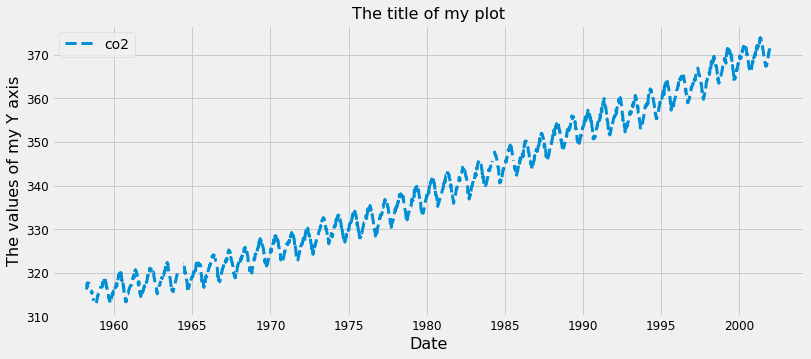

In [6]:
plt.style.use('fivethirtyeight')

ax = co2.plot(figsize=(12,5), fontsize=12, linewidth=3, linestyle='--')
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('The values of my Y axis', fontsize=16)
ax.set_title('The title of my plot', fontsize=16)

plt.show()

## Customize your time series plot

In [7]:
discoveries = pd.read_csv('../data/ch1_discoveries.csv', index_col='date')
discoveries.index = pd.to_datetime(discoveries.index)
discoveries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1860-01-01 to 1959-01-01
Data columns (total 1 columns):
Y    100 non-null int64
dtypes: int64(1)
memory usage: 1.6 KB


In [8]:
discoveries.head()

,Y
date,
1860-01-01,5
1861-01-01,3
1862-01-01,0
1863-01-01,2
1864-01-01,0


In [9]:
discoveries.tail()

,Y
date,
1955-01-01,1
1956-01-01,0
1957-01-01,0
1958-01-01,2
1959-01-01,0


In [10]:
discoveries['1900':'1905']

,Y
date,
1900-01-01,5
1901-01-01,2
1902-01-01,2
1903-01-01,4
1904-01-01,0
1905-01-01,4


In [11]:
?plt.style.available

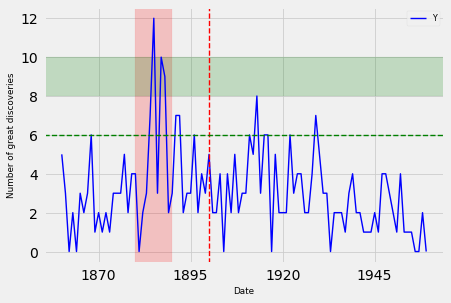

In [12]:
plt.style.use('seaborn-paper')
ax = discoveries.plot(color='blue', fontsize=14)

ax.set_xlabel('Date')
ax.set_ylabel('Number of great discoveries')

# Adding markers
ax.axvline(x='1900-01-01', color='red', linestyle='--')
ax.axhline(y=6, color='green', linestyle='--')

# Adding regions of interest
ax.axvspan('1880', '1890', color='red', alpha=0.2)
ax.axhspan(8, 10, color='green', alpha=0.2)

plt.show()

# Chapter 2 Clean your time series data

In [13]:
co2.isnull().head()

,co2
datestamp,
1958-03-29,False
1958-04-05,False
1958-04-12,False
1958-04-19,False
1958-04-26,False


In [14]:
co2.isnull().sum()

co2    59
dtype: int64

In [15]:
co2.notnull().head()

,co2
datestamp,
1958-03-29,True
1958-04-05,True
1958-04-12,True
1958-04-19,True
1958-04-26,True


In [16]:
co2.notnull().sum()

co2    2225
dtype: int64

In [17]:
co2 = co2.fillna(method='bfill')
co2.head()

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


## Plot aggregates of your data

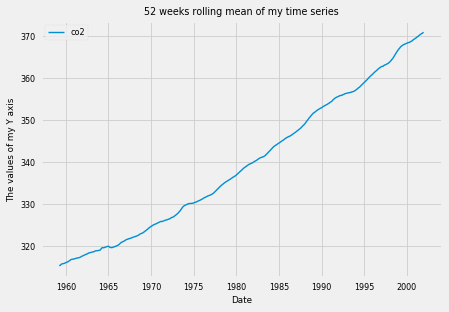

In [18]:
# The moving average model
co2_mean = co2.rolling(window=52).mean()

ax = co2_mean.plot()
ax.set_xlabel('Date')
ax.set_ylabel('The values of my Y axis')
ax.set_title('52 weeks rolling mean of my time series')
plt.show()

In [19]:
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', name='datestamp', length=2284, freq=None)

In [20]:
co2.index.month

Int64Index([ 3,  4,  4,  4,  4,  5,  5,  5,  5,  5,
            ...
            10, 11, 11, 11, 11, 12, 12, 12, 12, 12],
           dtype='int64', name='datestamp', length=2284)

In [21]:
co2.index.year

Int64Index([1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958, 1958,
            ...
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001],
           dtype='int64', name='datestamp', length=2284)

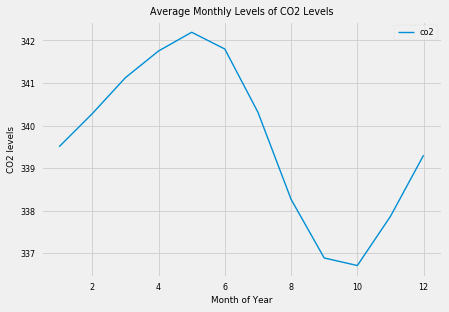

In [22]:
# Plotting aggregate values of your time series
index_month = co2.index.month
co2_month = co2.groupby(index_month).mean()
ax = co2_month.plot()
ax.set_xlabel('Month of Year')
ax.set_ylabel('CO2 levels')
ax.set_title('Average Monthly Levels of CO2 Levels')
plt.show()

## Summarizing the values in your time series data

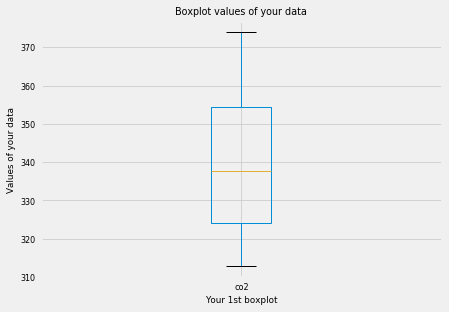

In [23]:
ax1 = co2.boxplot()
ax1.set_xlabel('Your 1st boxplot')
ax1.set_ylabel('Values of your data')
ax1.set_title('Boxplot values of your data')
plt.show()

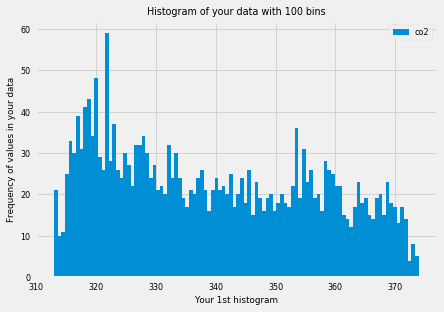

In [24]:
ax2 = co2.plot(kind='hist', bins=100)
ax2.set_xlabel('Your 1st histogram')
ax2.set_ylabel('Frequency of values in your data')
ax2.set_title('Histogram of your data with 100 bins')
plt.show()

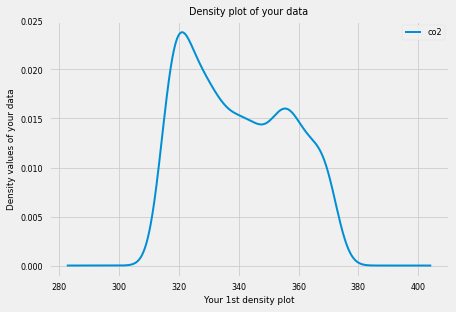

In [25]:
ax3 = co2.plot(kind='density', linewidth=2)
ax3.set_xlabel('Your 1st density plot')
ax3.set_ylabel('Density values of your data')
ax3.set_title('Density plot of your data')
plt.show()

# Chapter 3 Autocorrelation and partial autocorrelation

- Contrary to autocorrelation, partial autocorrelation removes the effect of previous time points
- Partial autocorrelation function of order 3 returns the correlation between our time series (t1, t2, t3, ...) and lagged values of itself by 3 time points (t4, t5, t6, ...) only after removing all effects attributable to lags 1 & 2

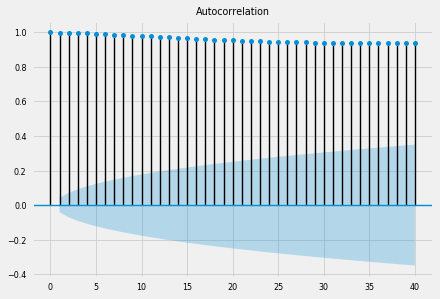

In [26]:
fig = tsaplots.plot_acf(co2['co2'], lags=40)
plt.show()

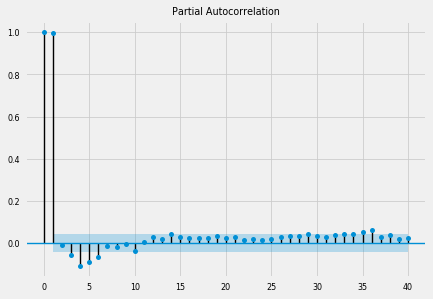

In [27]:
fig = tsaplots.plot_pacf(co2['co2'], lags=40)
plt.show()

## Seasonality, trend and noise in time series data

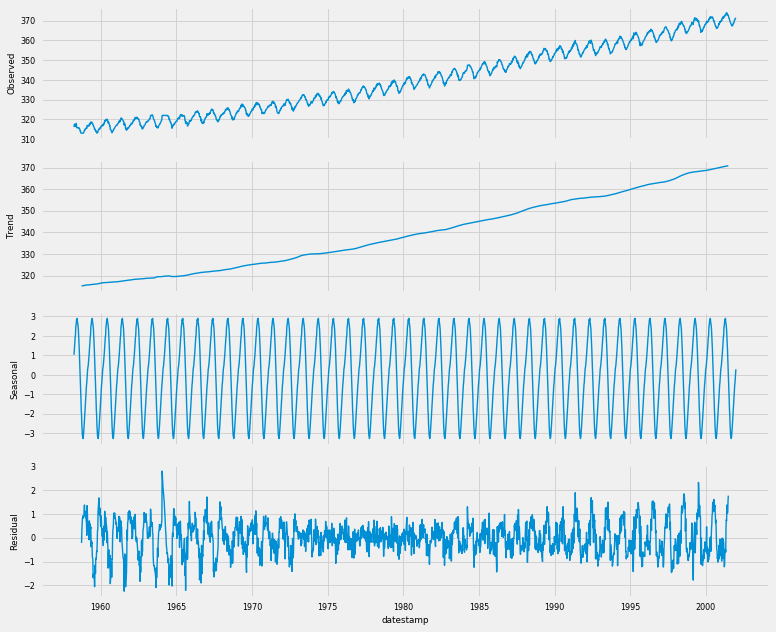

In [28]:
# Time series decomposition
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(co2['co2'])
fig = decomposition.plot()
plt.show()

In [29]:
# Decomposition methods
print(dir(decomposition))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'nobs', 'observed', 'plot', 'resid', 'seasonal', 'trend']


In [30]:
decomposition.seasonal.head()

datestamp
1958-03-29    1.028042
1958-04-05    1.235242
1958-04-12    1.412344
1958-04-19    1.701186
1958-04-26    1.950694
Name: co2, dtype: float64

## Seasonality component in time series

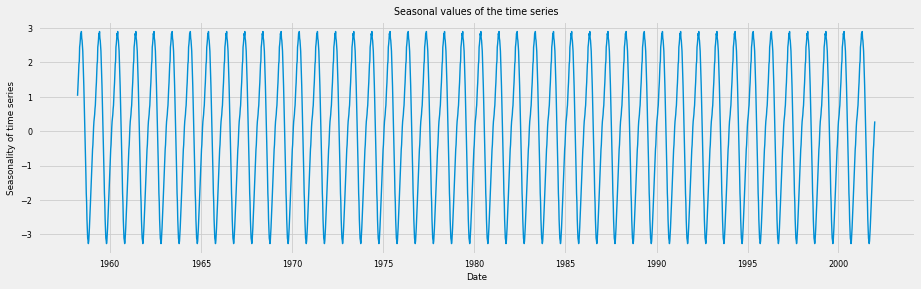

In [31]:
decomp_seasonal = decomposition.seasonal

ax = decomp_seasonal.plot(figsize=(14,4))
ax.set_xlabel('Date')
ax.set_ylabel('Seasonality of time series')
ax.set_title('Seasonal values of the time series')
plt.show()

## Trend component in time series

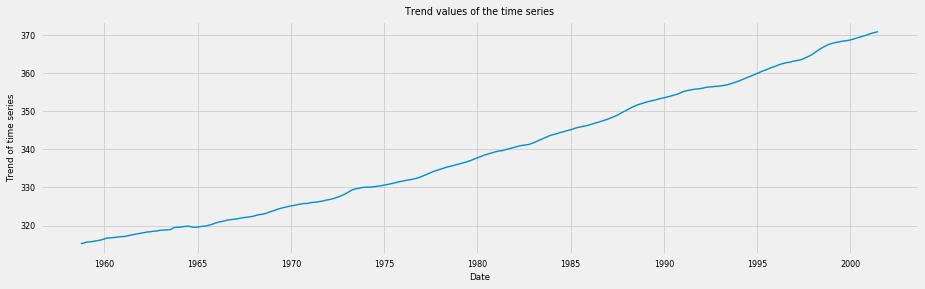

In [32]:
decomp_trend = decomposition.trend

ax = decomp_trend.plot(figsize=(14,4))
ax.set_xlabel('Date')
ax.set_ylabel('Trend of time series')
ax.set_title('Trend values of the time series')
plt.show()

## Noise component in time series

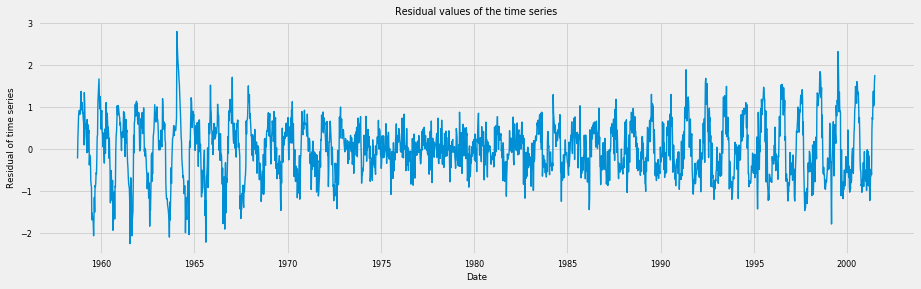

In [33]:
decomp_resid = decomposition.resid

ax = decomp_resid.plot(figsize=(14,4))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series')
plt.show()

# Chapter 4 Working with more than 1 time series

In [34]:
meat = pd.read_csv('../data/ch4_meat.csv', index_col='date')
meat.index = pd.to_datetime(meat.index)
meat.head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


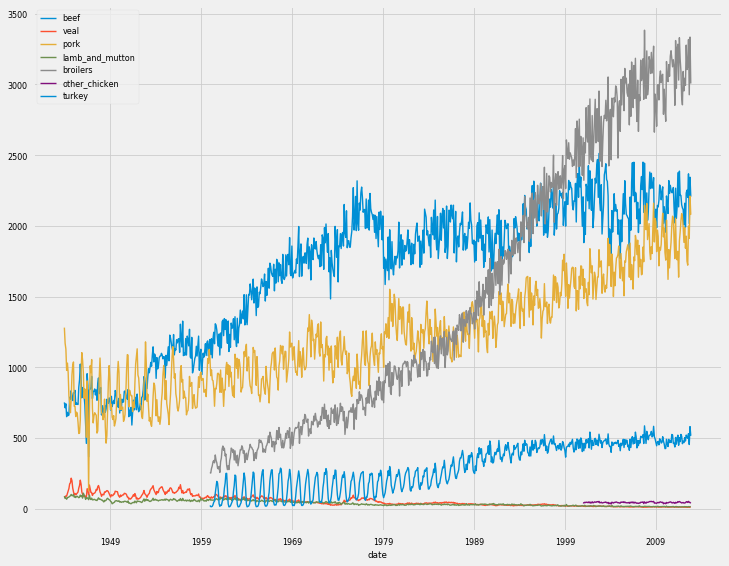

In [35]:
# Summarizing and plotting multiple time series
ax = meat.plot()
plt.show()

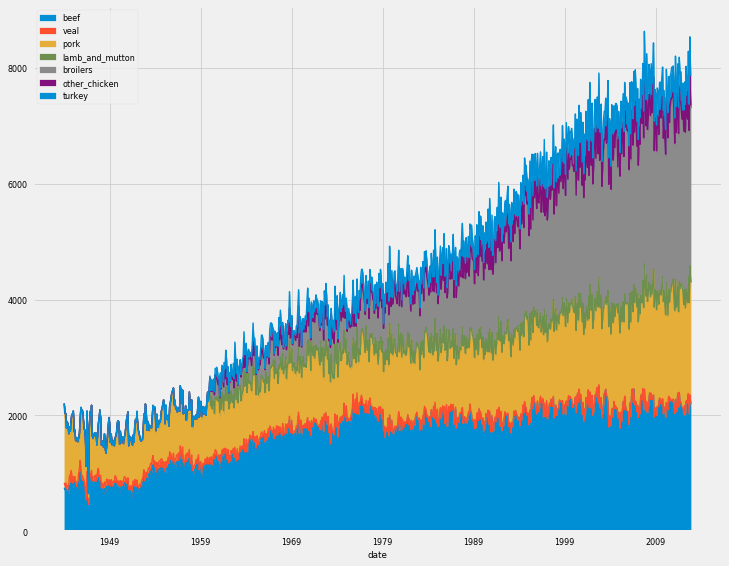

In [36]:
# Area charts
ax = meat.plot.area()
plt.show()

## Plot multiple time series

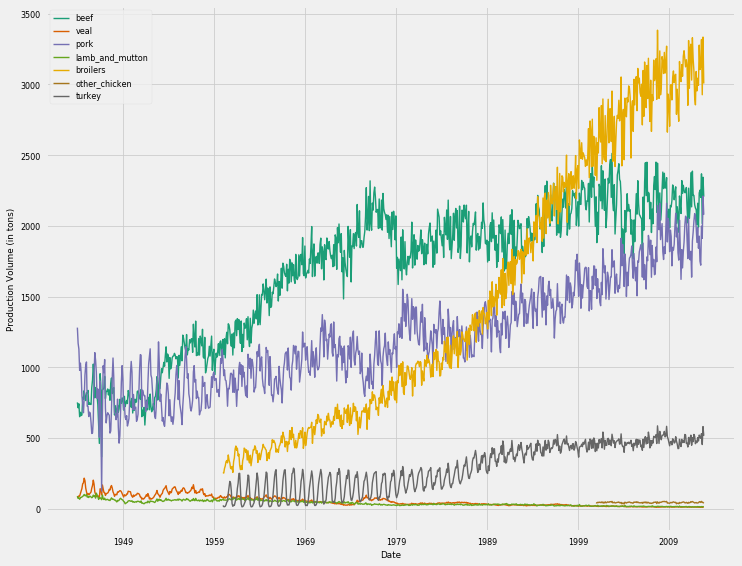

In [37]:
# The colormap argument
ax = meat.plot(colormap='Dark2')
ax.set_xlabel('Date')
ax.set_ylabel('Production Volume (in tons)')
plt.show()

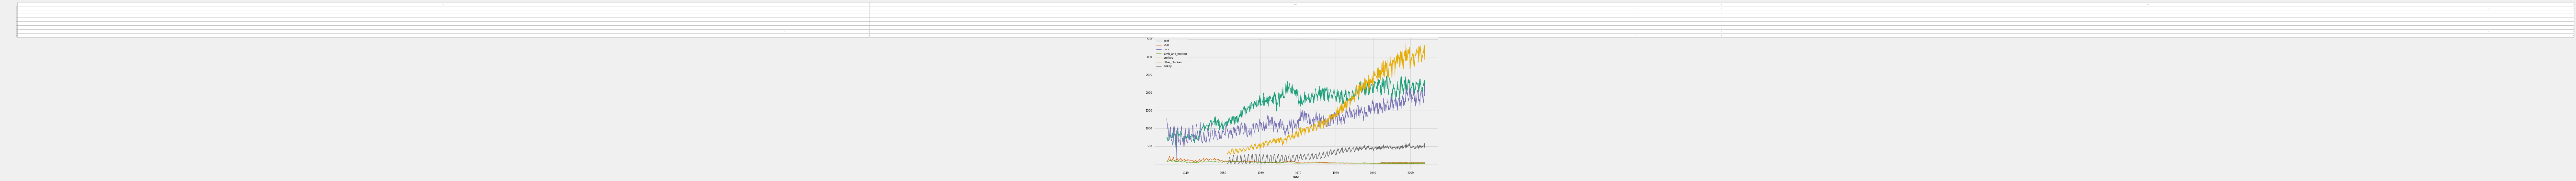

In [38]:
ax = meat.plot(colormap='Dark2', figsize=(14,7))

meat_summary = meat.describe()

# Add table to plot
ax.table(cellText=meat_summary.values, 
        colWidths=[0,3]*len(meat.columns),
        rowLabels=meat_summary.index,
        colLabels=meat_summary.columns,
        loc='top')

plt.show()

In [39]:
?plt.table

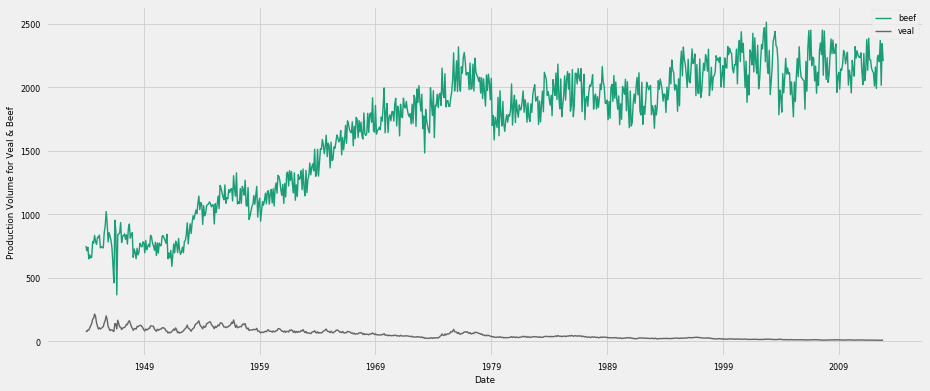

In [40]:
ax = meat[['beef', 'veal']].plot(colormap='Dark2', figsize=(14,6))
ax.set_xlabel('Date')
ax.set_ylabel('Production Volume for Veal & Beef')
plt.show()

## Facet plot

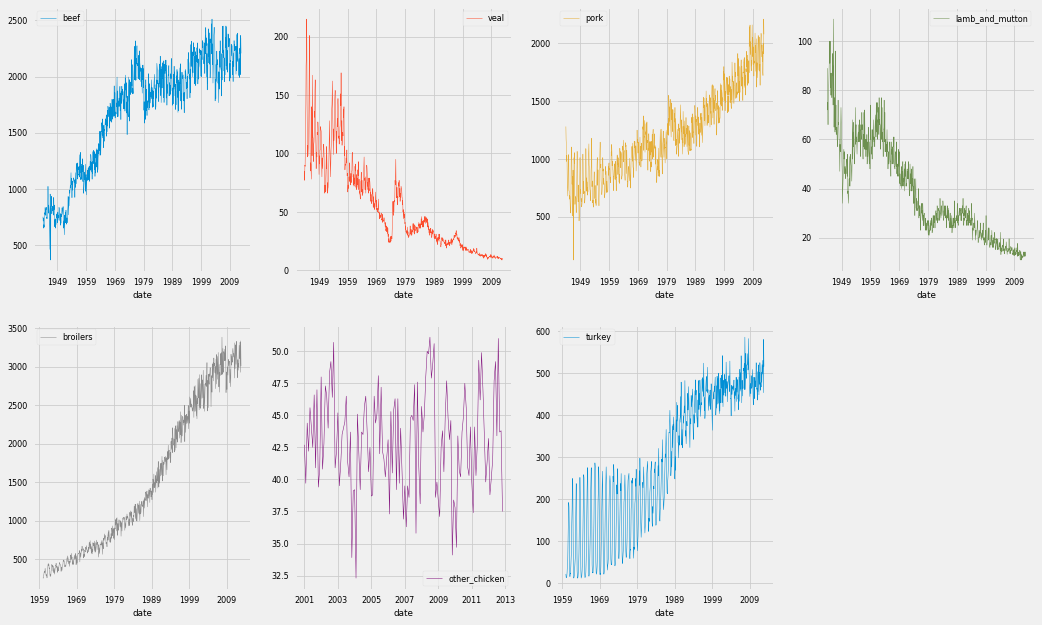

In [41]:
meat.plot(subplots=True, linewidth=0.5, layout=(2,4), figsize=(16,10), sharex=False, sharey=False)
plt.show()

## Finding relationships between multiple time series

The correlation coefficient is a measure used to determine the strength or lack of relationship between two
variables.

Pearson's coefficient can be used to compute the correlation coefficient between variables for which the relationship is thought to be linear.

Kendall Tau or Spearman rank can be used to compute the correlation coefficient between variables for which the relationship is thought to be non-linear.

In [42]:
from scipy.stats.stats import pearsonr, spearmanr, kendalltau

In [43]:
x = [1, 2, 4, 7]
y = [1, 3, 4, 8]

In [44]:
pearsonr(x, y)

(0.98430913277509968, 0.015690867224900321)

In [45]:
spearmanr(x, y)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [46]:
kendalltau(x, y)

KendalltauResult(correlation=1.0, pvalue=0.041540067009885176)

## Correlation matrix

- Range: \[-1, 1\]
- 0: no relationship
- -1: strong negative relationship
- 1: strong positive relationship
- The diagonal values will always be 1

In [47]:
corr_p = meat[['beef','veal','turkey']].corr(method='pearson')
print(corr_p)

            beef      veal    turkey
beef    1.000000 -0.829704  0.738070
veal   -0.829704  1.000000 -0.768366
turkey  0.738070 -0.768366  1.000000


In [48]:
corr_s = meat[['beef','veal','turkey']].corr(method='spearman')
print(corr_s)

            beef      veal    turkey
beef    1.000000 -0.812437  0.778533
veal   -0.812437  1.000000 -0.829492
turkey  0.778533 -0.829492  1.000000


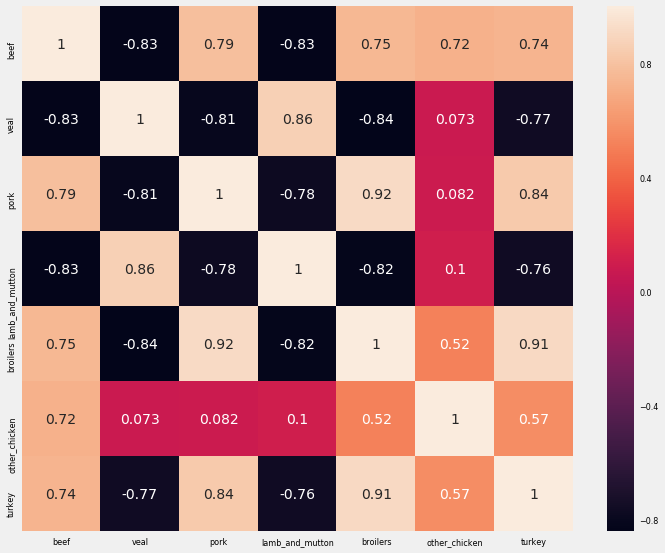

In [49]:
corr_mat = meat.corr(method='pearson')
sns.heatmap(corr_mat, annot=True)

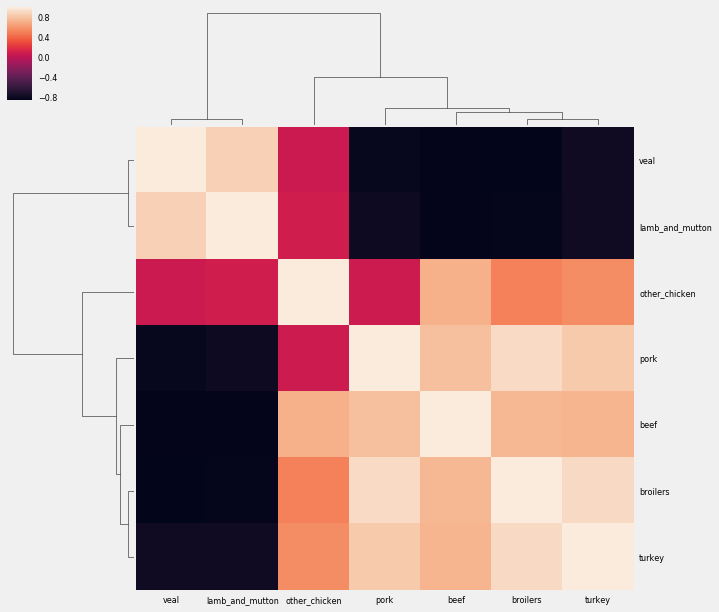

In [50]:
sns.clustermap(corr_mat)

# Chapter 5

In [51]:
jobs = pd.read_csv('../data/ch5_employment.csv', index_col='datestamp')
jobs.index = pd.to_datetime(jobs.index)
jobs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2000-01-01 to 2010-02-01
Data columns (total 16 columns):
Agriculture                       122 non-null float64
Business services                 122 non-null float64
Construction                      122 non-null float64
Durable goods manufacturing       122 non-null float64
Education and Health              122 non-null float64
Finance                           122 non-null float64
Government                        122 non-null float64
Information                       122 non-null float64
Leisure and hospitality           122 non-null float64
Manufacturing                     122 non-null float64
Mining and Extraction             122 non-null float64
Nondurable goods manufacturing    122 non-null float64
Other                             122 non-null float64
Self-employed                     122 non-null float64
Transportation and Utilities      122 non-null float64
Wholesale and Retail Trade        122 non-null floa

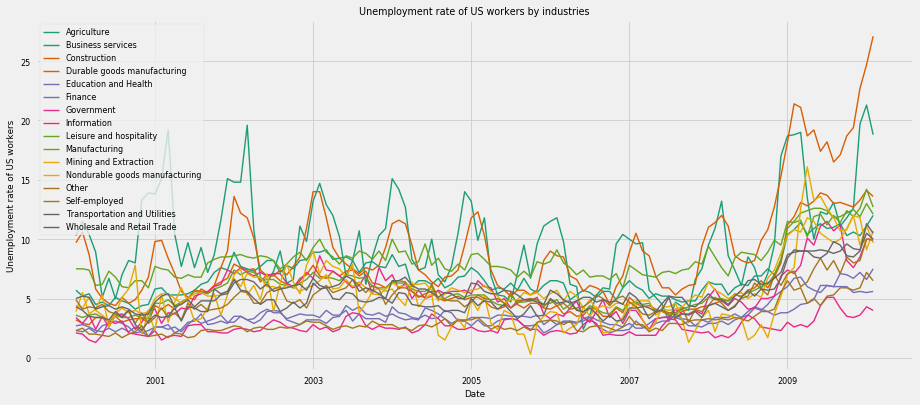

In [52]:
ax = jobs.plot(colormap='Dark2', figsize=(14,6))
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment rate of US workers')
ax.set_title('Unemployment rate of US workers by industries')
plt.show()

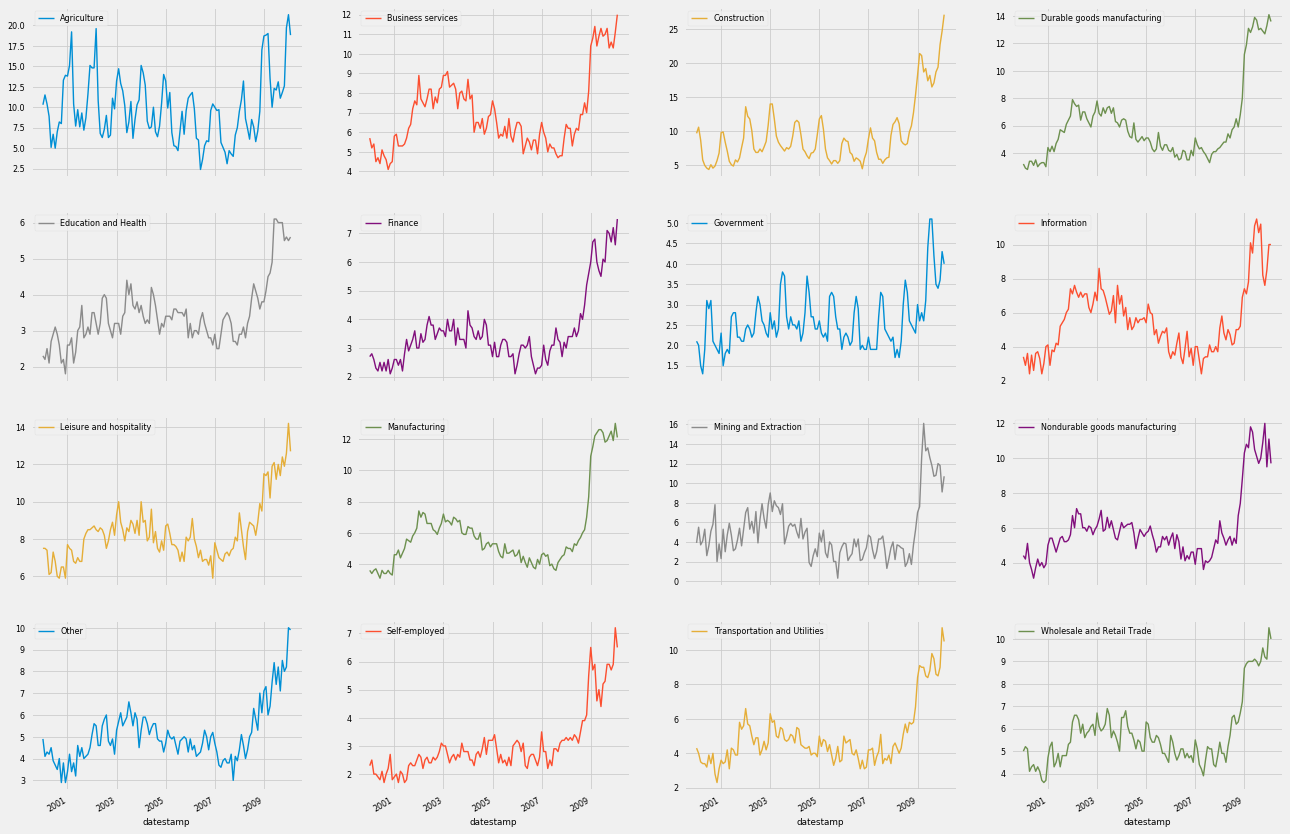

In [53]:
jobs.plot(subplots=True, layout=(4,4), figsize=(20, 16), sharex=True, sharey=False)
plt.show()

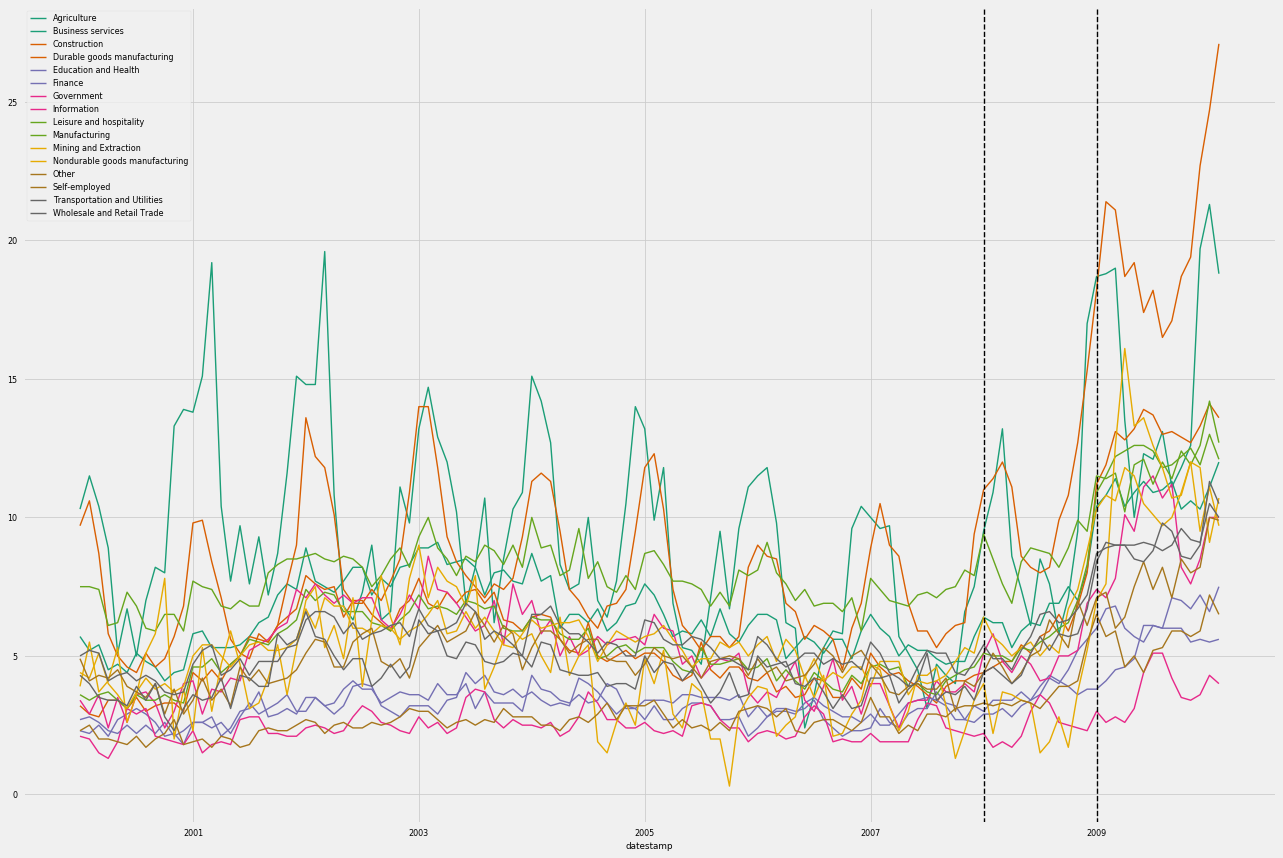

In [54]:
ax = jobs.plot(figsize=(20,14), colormap='Dark2')
ax.axvline('2008-01-01', color='black', linestyle='--')
ax.axvline('2009-01-01', color='black', linestyle='--')
plt.show()

## Taking seasonal average in the jobs dataset

In [55]:
index_month = jobs.index.month
jobs_by_month = jobs.groupby(index_month).mean()
jobs_by_month.head()

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
1,13.763636,7.863636,12.909091,6.700000,3.363636,3.572727,2.600000,5.772727,9.345455,6.609091,5.600000,6.481818,5.436364,3.600000,5.790909,6.481818
2,13.645455,7.645455,13.600000,6.563636,3.290909,3.890909,2.327273,5.900000,9.136364,6.500000,5.745455,6.418182,5.618182,3.390909,5.618182,6.372727
3,13.830000,7.130000,11.290000,5.850000,3.110000,3.450000,2.190000,5.360000,8.370000,6.000000,5.140000,6.240000,4.910000,2.880000,5.100000,5.860000
4,9.130000,6.270000,9.450000,5.810000,3.040000,3.280000,2.020000,5.230000,7.700000,5.890000,5.640000,6.060000,4.670000,2.680000,4.790000,5.460000
5,7.100000,6.600000,8.120000,5.690000,3.290000,3.350000,2.200000,5.480000,7.930000,5.720000,5.280000,5.790000,4.810000,2.770000,4.500000,5.490000


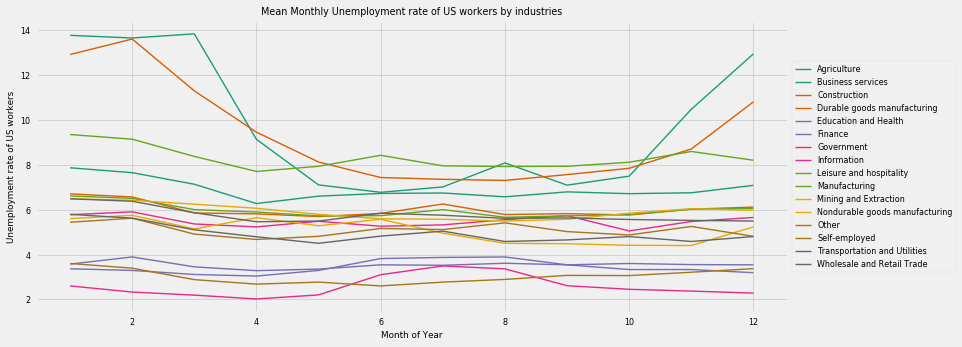

In [56]:
ax = jobs_by_month.plot(figsize=(12, 5), colormap='Dark2')
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left')
ax.set_xlabel('Month of Year')
ax.set_ylabel('Unemployment rate of US workers')
ax.set_title('Mean Monthly Unemployment rate of US workers by industries')
plt.show()

## Decompose time series data

In [57]:
my_dict = {}

# Extract the names of time series
ts_names = jobs.columns
ts_names

Index(['Agriculture', 'Business services', 'Construction',
       'Durable goods manufacturing', 'Education and Health', 'Finance',
       'Government', 'Information', 'Leisure and hospitality', 'Manufacturing',
       'Mining and Extraction', 'Nondurable goods manufacturing', 'Other',
       'Self-employed', 'Transportation and Utilities',
       'Wholesale and Retail Trade'],
      dtype='object')

In [58]:
# Run time series decomposition
for ts in ts_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    my_dict[ts] = ts_decomposition

my_dict

{'Agriculture': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f9a6e8a1358>,
 'Business services': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f9a71543b38>,
 'Construction': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f9a71543a58>,
 'Durable goods manufacturing': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f9a71543a90>,
 'Education and Health': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f9a6e9e1d68>,
 'Finance': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f9a6e9e17f0>,
 'Government': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f9a6e930b38>,
 'Information': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f9a6e930550>,
 'Leisure and hospitality': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f9a6e9305c0>,
 'Manufacturing': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f9a7126fcf8>,
 'Mining and Extraction': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f9a7126f588>,
 'Nondurable goods manufacturing': <statsmodels.tsa.seasonal.DecomposeResult at 0x7f9a7126f

In [59]:
my_dict_trend = {}

# Extract the trend component
for ts in ts_names:
    my_dict_trend[ts] = my_dict[ts].trend

# Convert to a DataFrame
trend_df = pd.DataFrame.from_dict(my_dict_trend)
trend_df.head(10)

,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
datestamp,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-01,9.170833,4.787500,6.329167,3.225000,2.462500,2.412500,2.150000,3.229167,6.641667,3.500000,4.366667,4.000000,3.829167,2.066667,3.412500,4.287500
2000-08-01,9.466667,4.820833,6.304167,3.325000,2.491667,2.400000,2.137500,3.258333,6.650000,3.591667,4.291667,4.075000,3.770833,2.029167,3.358333,4.275000
2000-09-01,9.983333,4.845833,6.262500,3.445833,2.520833,2.383333,2.129167,3.266667,6.650000,3.695833,4.254167,4.137500,3.737500,1.995833,3.333333,4.287500


## Compute correlations between time series

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

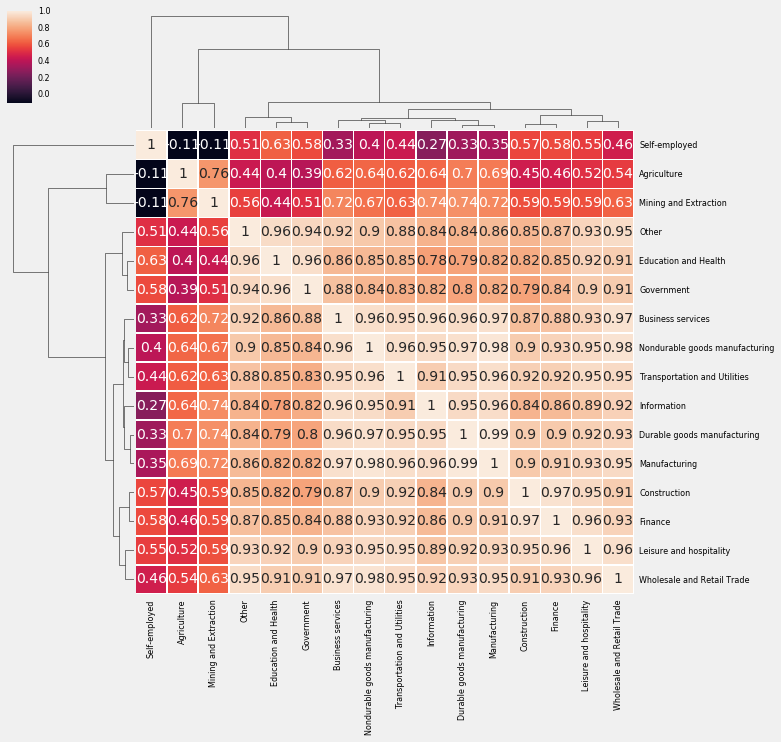

In [60]:
## Plotting a clustermap of the jobs correlation matrix
# Get correlation matrix of the seasonality
trend_corr = trend_df.corr(method='spearman')

# Customize the clustermap of the seasonlity corr correlation matrix
fig = sns.clustermap(trend_corr, annot=True, linewidth=0.4)

plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)